In [2]:
import pandas as pd

In [4]:
test = pd.read_csv('Test_data.csv')
train = pd.read_csv('Train_data.csv')
train.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
15386,0,tcp,ftp_data,SF,192,0,0,0,0,0,...,39,0.03,0.02,0.03,0.05,0.0,0.0,0.00,0.00,normal
2478,1,tcp,smtp,SF,2370,366,0,0,0,0,...,133,0.42,0.04,0.01,0.02,0.0,0.0,0.00,0.00,normal
18416,1,tcp,smtp,SF,1384,362,0,0,0,0,...,161,0.62,0.03,0.00,0.01,0.0,0.0,0.00,0.00,normal
4565,0,tcp,http,SF,201,978,0,0,0,0,...,255,1.00,0.00,0.11,0.01,0.0,0.0,0.00,0.00,normal
16082,0,tcp,http,SF,368,771,0,0,0,0,...,231,1.00,0.00,0.04,0.21,0.0,0.0,0.11,0.79,normal


In [8]:
train['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

In [9]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [10]:
# remove missing values (NaN)
train.dropna(inplace=True)
test.dropna(inplace=True)

In [11]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(train)
label_encoding(test)

train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,0
25188,0,1,19,9,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,0
25189,0,1,46,1,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
25190,0,1,38,5,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0


In [13]:
from sklearn.model_selection import train_test_split

X = train.drop(['class'], axis=1)
y = train['class']

In [23]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = scaler.fit_transform(X)

In [15]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, random_state=42, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, random_state=42, test_size=0.5)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def print_stats(predictions, X, y, title):
    # Predict the anomalies
    print(len(predictions[predictions == -1]), " outliers from ", len(predictions))
    print("0 is anomaly, 1 is normal")
    predictions = [0 if p == -1 else 1 for p in predictions]
    print(classification_report(y, predictions))

    conf = confusion_matrix(y_pred=predictions,y_true=y)
    plt.title(title)
    ax= plt.subplot()
    sns.heatmap(conf, annot=True, fmt="", linewidths=2, cmap="Greens")
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Real');
    ax.xaxis.set_ticklabels(['Normal', 'Anomaly']); 
    ax.yaxis.set_ticklabels(['Normal', 'Anomaly']);
    plt.show()


7327  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      9378
           1       0.79      0.94      0.86     10775

    accuracy                           0.84     20153
   macro avg       0.85      0.83      0.83     20153
weighted avg       0.85      0.84      0.83     20153



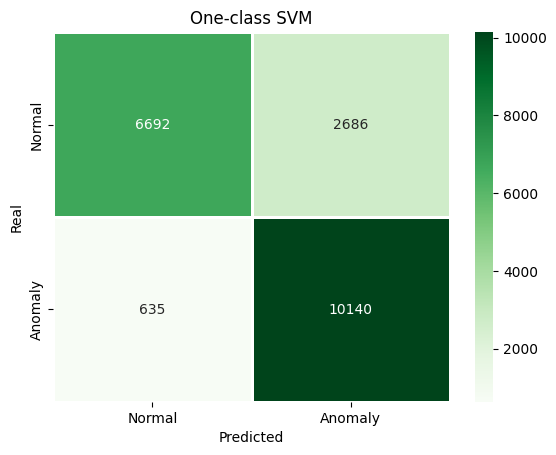

In [28]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel='poly', nu=0.2, gamma='scale').fit(X_train)
predictions = model.predict(X_train)
print_stats(predictions, X_train, y_train, "One-class SVM")

921  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1197
           1       0.78      0.94      0.86      1323

    accuracy                           0.83      2520
   macro avg       0.85      0.83      0.83      2520
weighted avg       0.85      0.83      0.83      2520



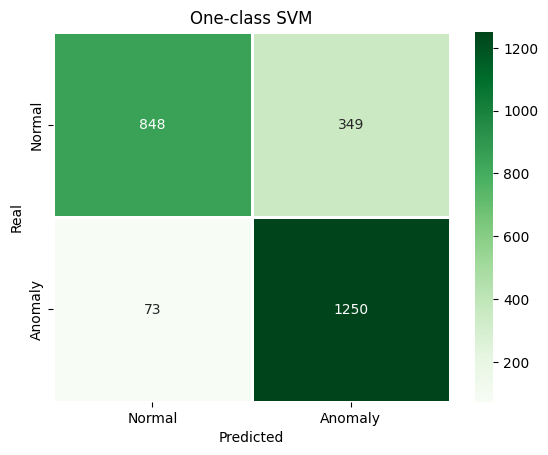

In [29]:
predictions = model.predict(X_test)
print_stats(predictions, X_test, y_test, "One-class SVM")

1156  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.35      0.04      0.08      9378
           1       0.53      0.93      0.67     10775

    accuracy                           0.52     20153
   macro avg       0.44      0.49      0.38     20153
weighted avg       0.45      0.52      0.40     20153



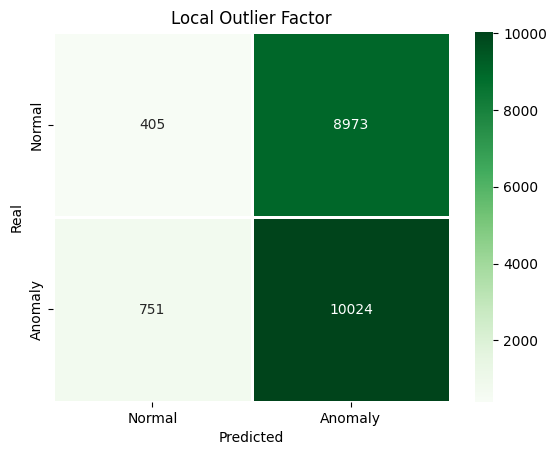

In [30]:
from sklearn.neighbors import LocalOutlierFactor

predictions = LocalOutlierFactor(n_neighbors=20, algorithm='auto').fit_predict(X_train)
print_stats(predictions, X_train, y_train, "Local Outlier Factor")


1737  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.67      0.12      0.21      9378
           1       0.55      0.95      0.70     10775

    accuracy                           0.56     20153
   macro avg       0.61      0.53      0.45     20153
weighted avg       0.61      0.56      0.47     20153



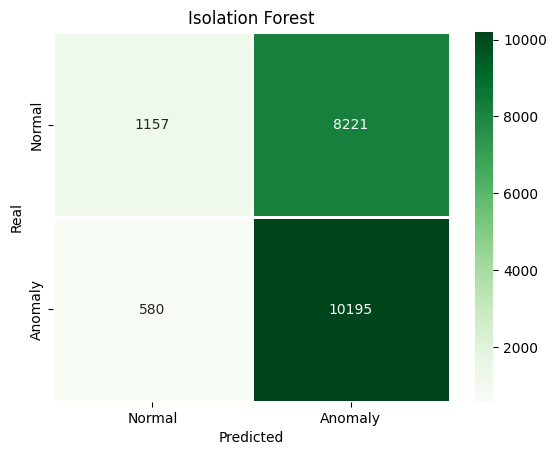

In [31]:
from sklearn.ensemble import IsolationForest

model = IsolationForest().fit(X_train)
predictions = model.predict(X_train)
print_stats(predictions, X_train, y_train, "Isolation Forest")